## This notebook will check the functionality of BP Mushu interface

In the end, it will plot the # of samples within each call of amp.get_data()


Import the library - get the new amp

In [67]:
import libmushu
amp = libmushu.get_amp('bpamp')

Configure the amp

In [68]:
amp.configure(remotecontrol=True,
              recorderip='10.100.0.3',
              recorderport=51244,
              pathtoworkspace='C:\\Vision\\Workfiles\\NF_64chEEG.rwksp',
              experimentnumber='Pre-Run01',
              subjectid='0001',
              n_channels=64,
              fs=5000)

connecting to 10.100.0.3 port 6700
sending b'1C:\\Vision\\Workfiles\\NF_64chEEG.rwksp'
sending b'2Pre-Run01'
sending b'30001'
sending b'4'
sending b'M'


start the amp - this will 
- 1) call Process DataCurator (the guardian of the Big Data Matrix (Container), which will allocate memory space and to all necessary upkeep) 
Proces will also call
- 2) Recorder which will continue listening to the input port of BP and decode incoming messages

In [69]:
amp.start('testsave2')

Starting UDP server
Starting TCP server
starting...
started the Recording!
OK .. starting the DataCurator.
Start
Number of channels: 64
Sampling interval: 200.0
Resolutions: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 10.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Channel Names: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'POz', 'ECG', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'FT9', 'FT10', 'Fpz', 'CPz']
Marker S 16 of type Stimulus
Marker S 16 of type Stimulus
Marker S 1

In [70]:
alld=[]
allm=[]
import time
starttime=time.time()
while time.time() - starttime < 20:
    time.sleep(.502)
    data, marker = amp.get_data()
    alld.append(data)
    for m in marker:
        allm.append(marker)
    
    print('---')
    # print(data.shape)
    # print(marker)

---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---


Stop the Amplifier (but retain possibility to query for incoming data)

In [71]:
amp.stop()

requesting to stop the acquisition
amplifier stopped!


## check data packets sizes

In [72]:
sizes=[]
for d in alld:
    sizes.append(d.shape)

In [73]:
import numpy as np

In [74]:
m=np.concatenate(sizes)

(0, 1)

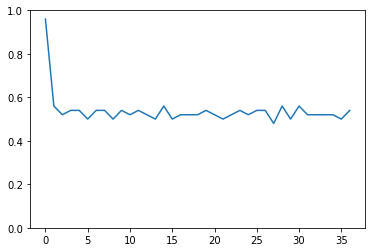

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(m[2::2]/5000)
plt.ylim((0, 1))

## check markers

In [76]:
allm

[[(0.2812, 'S 16')],
 [(0.1852, 'S 16')],
 [(0.3752, 'S 16')],
 [(0.4032, 'S  8')],
 [(0.1114, 'S  8')],
 [(0.2294, 'S  8')],
 [(0.3214, 'S128')],
 [(0.1574, 'S128')],
 [(0.0674, 'S128')],
 [(0.2134, 'S  2')],
 [(0.0914, 'S  2')],
 [(0.1574, 'S  2')]]

## Check the saved file

In [90]:
import struct
import json
fhe=open('testsave2.eeg')
fhm=open('testsave2.marker')
fhj=open('testsave2.meta')

### json = header

In [91]:
meta=json.load(fhj)
print(meta)

{'Channels': ['Ch-1', 'Ch-2', 'Ch-3', 'Ch-4', 'Ch-5', 'Ch-6', 'Ch-7', 'Ch-8', 'Ch-9', 'Ch-10', 'Ch-11', 'Ch-12', 'Ch-13', 'Ch-14', 'Ch-15', 'Ch-16', 'Ch-17', 'Ch-18', 'Ch-19', 'Ch-20', 'Ch-21', 'Ch-22', 'Ch-23', 'Ch-24', 'Ch-25', 'Ch-26', 'Ch-27', 'Ch-28', 'Ch-29', 'Ch-30', 'Ch-31', 'Ch-32', 'Ch-33', 'Ch-34', 'Ch-35', 'Ch-36', 'Ch-37', 'Ch-38', 'Ch-39', 'Ch-40', 'Ch-41', 'Ch-42', 'Ch-43', 'Ch-44', 'Ch-45', 'Ch-46', 'Ch-47', 'Ch-48', 'Ch-49', 'Ch-50', 'Ch-51', 'Ch-52', 'Ch-53', 'Ch-54', 'Ch-55', 'Ch-56', 'Ch-57', 'Ch-58', 'Ch-59', 'Ch-60', 'Ch-61', 'Ch-62', 'Ch-63', 'Ch-64'], 'Sampling Frequency': 5000, 'Amp': '<libmushu.driver.brainproducts.BPAmp object at 0x7f7e70649400>'}


In [112]:
meta['Channels']

['Ch-1',
 'Ch-2',
 'Ch-3',
 'Ch-4',
 'Ch-5',
 'Ch-6',
 'Ch-7',
 'Ch-8',
 'Ch-9',
 'Ch-10',
 'Ch-11',
 'Ch-12',
 'Ch-13',
 'Ch-14',
 'Ch-15',
 'Ch-16',
 'Ch-17',
 'Ch-18',
 'Ch-19',
 'Ch-20',
 'Ch-21',
 'Ch-22',
 'Ch-23',
 'Ch-24',
 'Ch-25',
 'Ch-26',
 'Ch-27',
 'Ch-28',
 'Ch-29',
 'Ch-30',
 'Ch-31',
 'Ch-32',
 'Ch-33',
 'Ch-34',
 'Ch-35',
 'Ch-36',
 'Ch-37',
 'Ch-38',
 'Ch-39',
 'Ch-40',
 'Ch-41',
 'Ch-42',
 'Ch-43',
 'Ch-44',
 'Ch-45',
 'Ch-46',
 'Ch-47',
 'Ch-48',
 'Ch-49',
 'Ch-50',
 'Ch-51',
 'Ch-52',
 'Ch-53',
 'Ch-54',
 'Ch-55',
 'Ch-56',
 'Ch-57',
 'Ch-58',
 'Ch-59',
 'Ch-60',
 'Ch-61',
 'Ch-62',
 'Ch-63',
 'Ch-64']

### binary = raw data

In [262]:
import numpy as np

f = open("testsave2.eeg", "r")
m = np.fromfile(f, dtype=np.uint32)

In [263]:
len(m)/64

141400.0

In [264]:
m=a.reshape(64,round(len(m)/64))

In [265]:
import mne

In [266]:
# Generate some random data

# Initialize an info structure
info = mne.create_info(
    ch_names=meta['Channels'],
    ch_types = ['eeg' for i in range(64)],
    sfreq=meta['Sampling Frequency']
)

custom_raw = mne.io.RawArray(m, info)
print(custom_raw)

Creating RawArray with float64 data, n_channels=64, n_times=141400
    Range : 0 ... 141399 =      0.000 ...    28.280 secs
Ready.
<RawArray  |  None, n_channels x n_times : 64 x 141400 (28.3 sec), ~69.2 MB, data loaded>


### markers

In [267]:
with open('testsave2.marker') as file:
    content = file.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 
print(content)

import re

# create the marker matrix
ev_arr=[]
for i, item in enumerate(content):
    out=re.split("[\s|S|T]+", item)
    sample = int(float(out[0])/1000*meta['Sampling Frequency'])
    code = int(out[1])
    
    print(out)
    ev_arr.append([sample, 0, code])
    


# create marker channel for MNE python:
info = mne.create_info(['STI'], custom_raw.info['sfreq'], ['stim'])
stim_data = np.zeros((1, len(custom_raw.times)))
stim_raw = mne.io.RawArray(stim_data, info)
custom_raw.add_channels([stim_raw], force_update_info=True)

# create the marker matrix:
custom_raw.add_events(ev_arr)



['11520.281200 S 16', '12560.185200 S 16', '14140.375200 S 16', '16220.403200 S  8', '16780.111400 S  8', '17800.229400 S  8', '20400.321400 S128', '21460.157400 S128', '22520.067400 S128', '24600.213400 S  2', '25680.091400 S  2', '27240.157400 S  2']
['11520.281200', '16']
['12560.185200', '16']
['14140.375200', '16']
['16220.403200', '8']
['16780.111400', '8']
['17800.229400', '8']
['20400.321400', '128']
['21460.157400', '128']
['22520.067400', '128']
['24600.213400', '2']
['25680.091400', '2']
['27240.157400', '2']
Creating RawArray with float64 data, n_channels=1, n_times=141400
    Range : 0 ... 141399 =      0.000 ...    28.280 secs
Ready.


In [268]:
ev_arr

[[57601, 0, 16],
 [62800, 0, 16],
 [70701, 0, 16],
 [81102, 0, 8],
 [83900, 0, 8],
 [89001, 0, 8],
 [102001, 0, 128],
 [107300, 0, 128],
 [112600, 0, 128],
 [123001, 0, 2],
 [128400, 0, 2],
 [136200, 0, 2]]

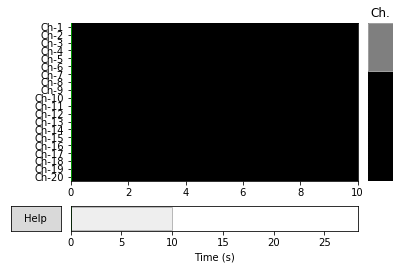

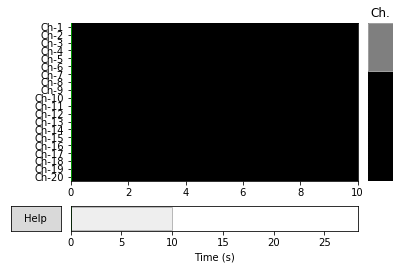

In [269]:
custom_raw.plot()

In [273]:
custom_raw.save('test2raw.fif')

Writing /home/nfcontrol/repos/rt-cwl-eeg-fmri/mushu/test2raw.fif
Closing /home/nfcontrol/repos/rt-cwl-eeg-fmri/mushu/test2raw.fif [done]
